In [25]:
PDF_BASE_PATH = 'data/'

# Convert PDF to Image

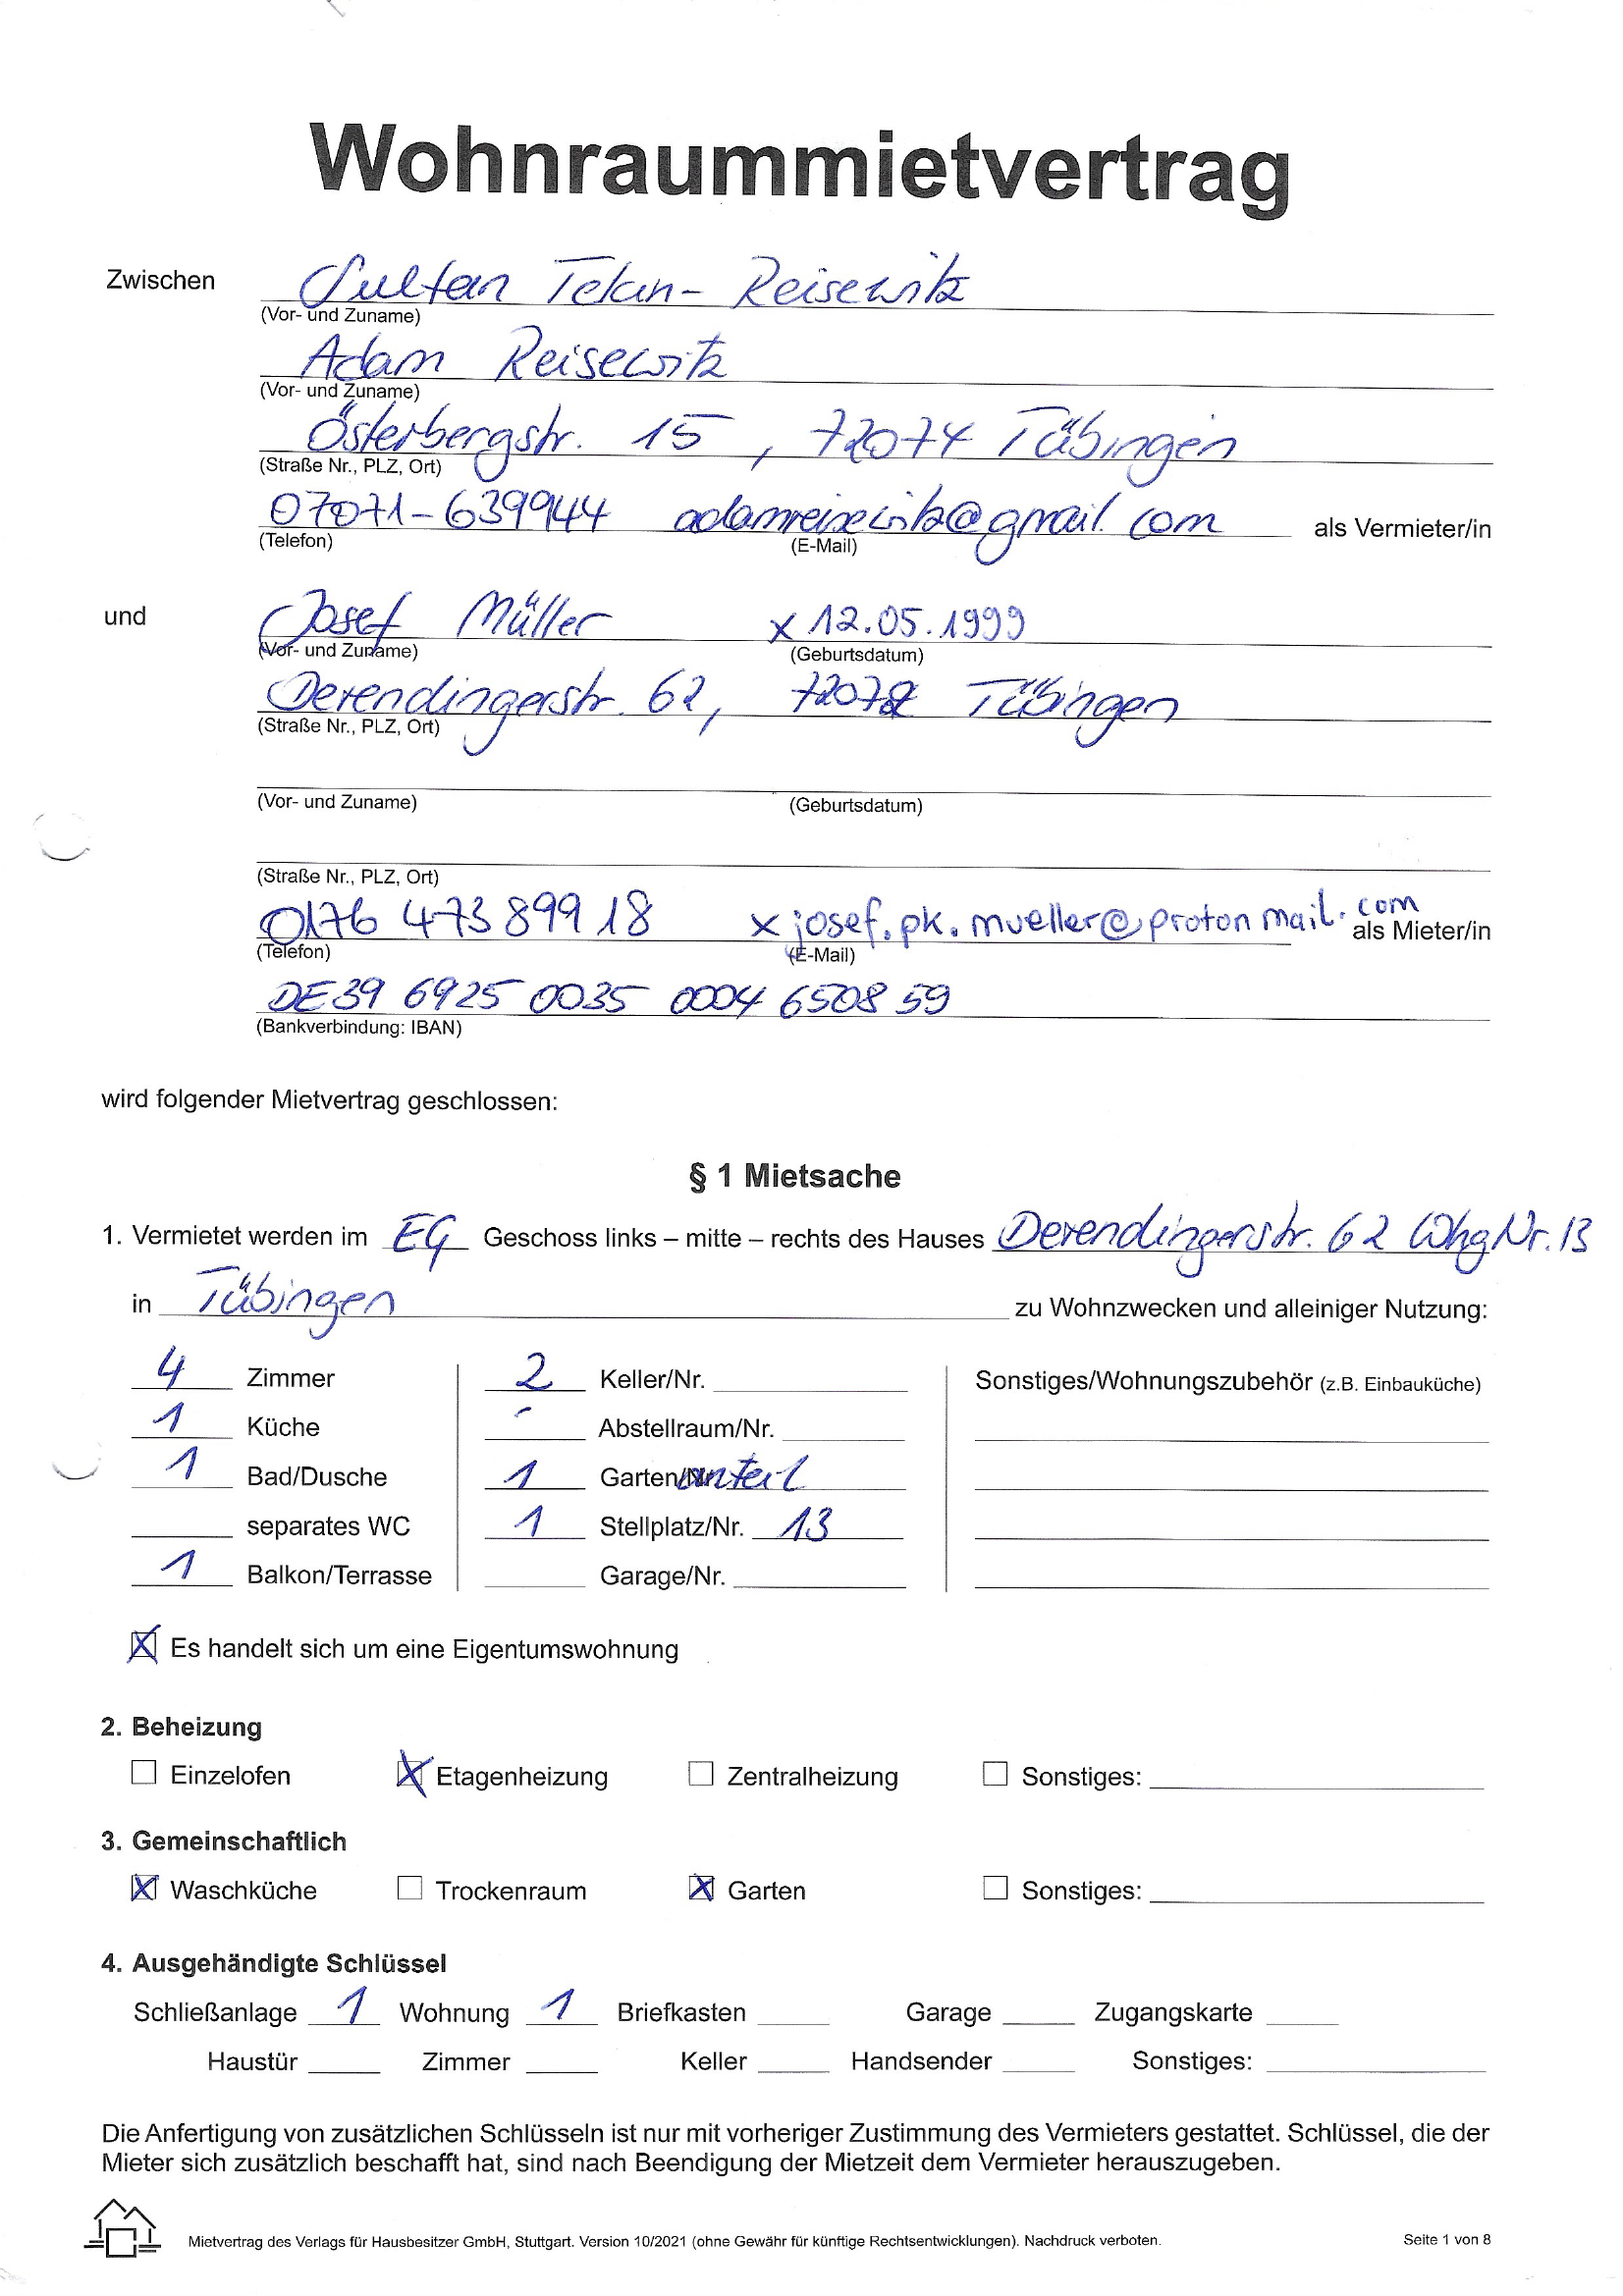

In [26]:
import pdf2image # For pdf2image, make sure poppler is installed
images = pdf2image.convert_from_path(PDF_BASE_PATH + 'contract1.pdf')
for i, image in enumerate(images):
    image.save(f'data/contract1_{i}.jpg', 'JPEG')
images[0]

# OCR with EasyOCR

In [27]:
import easyocr # For OCR
reader = easyocr.Reader(['de'])
transcription_easyocr = reader.readtext('data/contract1_0.jpg')

# Print transcription
print("Transcription (EasyOCR):", transcription_easyocr)

Transcription (EasyOCR): [([[np.int32(310), np.int32(91)], [np.int32(1331), np.int32(91)], [np.int32(1331), np.int32(241)], [np.int32(310), np.int32(241)]], 'Wohnraummietvertrag', np.float64(0.8246331694704574)), ([[np.int32(106), np.int32(270)], [np.int32(224), np.int32(270)], [np.int32(224), np.int32(300)], [np.int32(106), np.int32(300)]], 'Zwischen', np.float64(0.9999920342324898)), ([[np.int32(299), np.int32(257)], [np.int32(529), np.int32(257)], [np.int32(529), np.int32(317)], [np.int32(299), np.int32(317)]], 'Cuele', np.float64(0.4489325899322052)), ([[np.int32(554), np.int32(264)], [np.int32(700), np.int32(264)], [np.int32(700), np.int32(316)], [np.int32(554), np.int32(316)]], 'Zelan', np.float64(0.562901772190556)), ([[np.int32(742), np.int32(252)], [np.int32(997), np.int32(252)], [np.int32(997), np.int32(320)], [np.int32(742), np.int32(320)]], 'Rejseznk', np.float64(0.3976743209010336)), ([[np.int32(262), np.int32(307)], [np.int32(432), np.int32(307)], [np.int32(432), np.int32

As can be seen, the library struggles with the handwritten parts of the contract.
Thus it's not a suitable solution for this task.

What is needed is a library that also can handle handwritten text (HTR).
For this, after a quick search,
I found an article from HuggingFace presenting HTRflow: <https://huggingface.co/blog/Gabriel/htrflow>

Let's copy their code and adapt it to our needs.

In [30]:
from transformers import TrOCRProcessor, VisionEncoderDecoderModel
from PIL import Image
import requests

# Load the processor and model
processor = TrOCRProcessor.from_pretrained('Riksarkivet/trocr-base-handwritten-hist-swe-2')
model = VisionEncoderDecoderModel.from_pretrained('Riksarkivet/trocr-base-handwritten-hist-swe-2')

# Load an image containing handwritten text, e.g local image or an image URL
image_url = PDF_BASE_PATH + 'contract1_0.jpg'
image = Image.open(image_url).convert('RGB')

# Preprocess the image
pixel_values = processor(images=image, return_tensors="pt").pixel_values

# Generate transcription (you can adjust parameters like max_length and num_beams)
generated_ids = model.generate(pixel_values, max_length=512)

# Decode the generated IDs to text
transcription = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]

print("Transcription (HTRflow):", transcription)

Config of the encoder: <class 'transformers.models.vit.modeling_vit.ViTModel'> is overwritten by shared encoder config: ViTConfig {
  "attention_probs_dropout_prob": 0.0,
  "encoder_stride": 16,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.0,
  "hidden_size": 768,
  "image_size": 384,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "model_type": "vit",
  "num_attention_heads": 12,
  "num_channels": 3,
  "num_hidden_layers": 12,
  "patch_size": 16,
  "qkv_bias": false,
  "transformers_version": "4.47.1"
}

Config of the decoder: <class 'transformers.models.trocr.modeling_trocr.TrOCRForCausalLM'> is overwritten by shared decoder config: TrOCRConfig {
  "activation_dropout": 0.0,
  "activation_function": "relu",
  "add_cross_attention": true,
  "attention_dropout": 0.0,
  "bos_token_id": 0,
  "classifier_dropout": 0.0,
  "cross_attention_hidden_size": 768,
  "d_model": 1024,
  "decoder_attention_heads": 16,
  "decoder_ffn_dim": 4096,
  "decoder

Transcription HTRflow): Kongl. Maij:ttz säger
